In [26]:
import json
import requests
from config import api_key
from itertools import islice
import matplotlib.pyplot as plt
import requests
import pandas as pd

# Part I - WeatherPy

In [34]:
lat = []
lng = []
cityid=[]
cityname=[]
temp=[]
hum=[]
cloud=[]
wind=[]

limit=600
with open('city_list.json',encoding="utf8") as f:
    data = json.load(f)

for r in islice(data, limit):
    cityid.append(r["id"])
    cityname.append(r["name"])
    lat.append(r["coord"]["lat"])
    lng.append(r["coord"]["lon"])
    print(r["id"], r["name"],r["coord"]["lat"],r["coord"]["lon"] )

833 Ḩeşār-e Sefīd 34.330502 47.159401
2960 ‘Ayn Ḩalāqīm 34.940079 36.321911
3245 Taglag 38.450001 44.98333
3530 Qabāghlū 36.173302 46.168499
5174 ‘Arīqah 32.889809 36.48336
7264 Kalāteh-ye Dowlat 36.163841 57.616982
8084 Behjatābād 36.667431 51.461639
9874 Ţālesh Maḩalleh 36.894329 50.679192
11263 Shahrīār Kandeh 36.631939 53.19902
11754 Bālā Aḩmad Kolā 36.649059 52.667271
12795 Aş Şūrah aş Şaghīrah 33.032669 36.573872
14177 Āqdūz 39.197498 44.26556
14256 Āzādshahr 34.790878 48.570728
18007 Gollar 37.383331 46.25
18093 Dīgāleh 37.552502 45.106998
18557 Qarālar-e Mīrzā Ḩoseynqolī 37.674702 45.067501
18918 Protaras 35.012501 34.058331
23814 Kahrīz 34.383801 47.055302
24851 Nūrābād 34.073399 47.9725
29033 Rokan Sarā 37.32085 49.608101
30321 Zīrjān 34.214401 58.43586
30485 Dahasuways 15.72389 50.729439
30490 Ash Shihr 14.75863 49.606392
30543 Al Ghaylah 14.59583 45.583328
30616 Judaydah 15.07512 45.299622
30689 Dawran 13.77436 44.441959
30696 Najd al Jumai 13.91581 44.324139
30714 Zalmat a

88562 At Tāj 24.20487 23.2857
88603 Aş Şafşāf 32.777458 21.94923
88635 Ash Shawāshinah 29.171671 21.29417
88823 Al ‘Urūbah 32.116669 20.066669
88834 Tūkrah 32.534142 20.579109
88835 Al Qubbah 32.76162 22.242371
88903 Al Marj 32.48798 20.831739
88904 Al Marj 31.933331 21.316669
88930 Al Kufrah 24.16667 23.269621
88962 Al Jawf 24.1989 23.29093
88967 Al Jaghbūb 29.74262 24.51676
89055 Al Bayḑā’ 32.762718 21.75506
89087 Al Abyār 32.189999 20.596531
89113 Ajdabiya 30.755449 20.226259
89341 Muḩāfaz̧at al Başrah 30.33333 47.25
89570 Zaxo 37.14817 42.700081
89693 Muhafazat Wasit 32.75 45.416672
89824 Umm Qaşr 30.040541 47.916771
89977 Ūlwur 35.115002 45.749722
90026 Tozkhurmato 34.890461 44.62994
90150 Tikrīt 34.607121 43.678219
90353 Tallkayf 36.489441 43.119171
90552 Sulaymānīyah 34.149719 42.381939
90708 Sīnah 36.809021 43.03886
91597 Sāmarrā’ 34.200958 43.875622
91695 Muhafazat Salah ad Din 34.5 43.650002
91812 Nāḩīyat Saddat al Hindīyah 32.714722 44.280281
91823 Aḩmad Ţāhir 34.316669 45.3

In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = url + "appid=" + api_key + "&q="

In [36]:
for city in islice(cityname, limit):
    response = requests.get(query_url + city).json()
    temp.append(response['main']['temp'])
    hum.append(response['main']['humidity'])
    cloud.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])

In [37]:
weather_dict = {
    "CityName": cityname,
    "Latitude": lat,
    "Longitude":lng,
    "Temperature (F)": temp,
    "Humidity (%)":hum,
    "Cloudiness (%)":cloud,
    "Wind Speed (mph)":wind,
}

In [38]:
weather_data = pd.DataFrame(weather_dict)
weather_data

,CityName,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ḩeşār-e Sefīd,34.330502,47.159401,275.15,60,0,2.06
1,‘Ayn Ḩalāqīm,34.940079,36.321911,283.15,81,0,2.06
2,Taglag,38.450001,44.983330,278.00,64,0,2.14
3,Qabāghlū,36.173302,46.168499,276.05,70,0,2.21
4,‘Arīqah,32.889809,36.483360,278.15,75,0,3.09
...,...,...,...,...,...,...,...
595,Al Arţāwīyah,26.505260,45.344372,290.85,29,0,5.75
596,Al ‘Aqīq,20.273581,41.664341,288.15,38,0,1.54
597,Al Awjām,26.563240,49.943310,287.10,54,0,2.06
598,Afif,23.906500,42.917240,288.38,30,0,5.74


In [39]:
weather_data.to_csv('Results\weather_data.csv')

## Temperature (F) vs. Latitude 

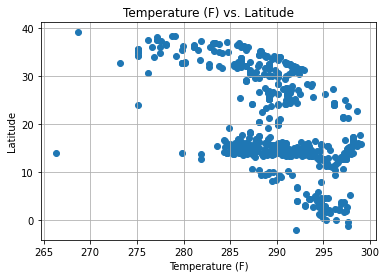

In [11]:
plt.scatter(weather_data["Temperature (F)"], weather_data["Latitude"], marker="o")

plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")
plt.grid(True)
plt.savefig("TemperaturevsLatitude.png")
plt.show()

#### Conclusions
In the previuos graph we can visualize the relathionship between                temperature and latitude of 600 cities across the world. We can conclude        from the graph that the further the city to the ecuador the lowest the          temperature 

## Humidity (%) vs. Latitude

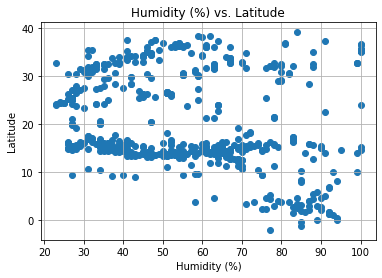

In [12]:
plt.scatter(weather_data["Humidity (%)"], weather_data["Latitude"], marker="o")

plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.grid(True)
plt.savefig("HumidityvsLatitude.png")
plt.show()

### Conclusions
In the previuos graph we can visualize the relathionship between                humidity and latitude of 600 cities across the world. We can                    conclude from the graph that there is not a clear relantioship between the      two variables, however, the bigger concentration of high temperatures          is at the cities closest to the ecuador 

## Cloudiness (%) vs. Latitude

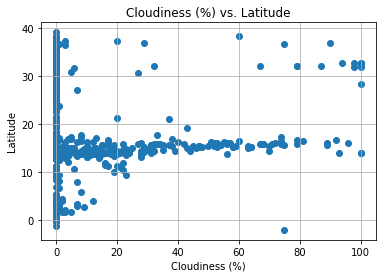

In [13]:
plt.scatter(weather_data["Cloudiness (%)"], weather_data["Latitude"], marker="o")

plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("CloudinessvsLatitude.png")
plt.show()

### Conclusions
In the previuos graph we can visualize the relathionship between                Cloudiness and Latitude of 600 cities across the world. We can                conclude from the graph that the cities located in a latitude between 10 and 20 have a high concentration  of cloudiness.

## Wind Speed (mph) vs. Latitude

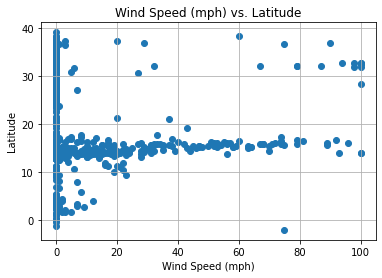

In [14]:
plt.scatter(weather_data["Cloudiness (%)"], weather_data["Latitude"], marker="o")

plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("WindSpeedvsLatitude.png")
plt.show()

### Conclusions
In the previuos graph we can visualize the relathionship between                Wind speed and Latitude of 600 cities across the world. The behaviour of this graph is pretty similar at the previous graph.
We can conclude from the graph that the cities located in a latitude between 10 and 20 have a high concentration of wind speed.

In [15]:
Northern_Hemisphere = weather_data.loc[lambda weather_data: weather_data['Latitude'] >= 0]

In [16]:
Northern_Hemisphere

,CityName,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Ḩeşār-e Sefīd,34.330502,47.159401,275.15,60,0,0.30
1,‘Ayn Ḩalāqīm,34.940079,36.321911,284.15,71,0,2.06
2,Taglag,38.450001,44.983330,278.80,62,0,2.18
3,Qabāghlū,36.173302,46.168499,276.61,67,0,2.24
4,‘Arīqah,32.889809,36.483360,280.15,70,0,4.12
...,...,...,...,...,...,...,...
595,Al Arţāwīyah,26.505260,45.344372,291.45,28,0,5.08
596,Al ‘Aqīq,20.273581,41.664341,290.15,34,0,2.57
597,Al Awjām,26.563240,49.943310,289.10,51,0,3.60
598,Afif,23.906500,42.917240,289.43,28,1,5.78


### °Northern Hemisphere - Temperature (F) vs. Latitude

In [ ]:
x_values = Northern_Hemisphere['Temperature (F)']
y_values = Northern_Hemisphere['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Temperature (F)")
plt.ylabel('Latitude')
plt.show()

In [19]:
Southern_Hemisphere=weather_data.loc[lambda weather_data: weather_data['Latitude'] < 0]

In [20]:
Southern_Hemisphere

,CityName,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
58,Republic of Rwanda,-2.00000,30.000000,292.09,77,75,3.60
84,Kismayo,-0.35817,42.545361,297.60,85,0,6.22
115,Buur Gaabo,-1.21933,41.837360,297.66,85,0,4.90
